In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
url = '/content/drive/MyDrive/magic04.data'

In [6]:
data = pd.read_csv(url, header=None)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19020 non-null  float64
 1   1       19020 non-null  float64
 2   2       19020 non-null  float64
 3   3       19020 non-null  float64
 4   4       19020 non-null  float64
 5   5       19020 non-null  float64
 6   6       19020 non-null  float64
 7   7       19020 non-null  float64
 8   8       19020 non-null  float64
 9   9       19020 non-null  float64
 10  10      19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [10]:
data[10].unique()

array(['g', 'h'], dtype=object)

In [11]:
data[10].value_counts()

g    12332
h     6688
Name: 10, dtype: int64

In [12]:
replace_dict = {'g': 1, 'h': 0}
data[10].replace(replace_dict, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [13]:
classifier = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', GradientBoostingClassifier()),
])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(10, axis=1), data[10], test_size=0.33, random_state=42)

In [15]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('classifier', GradientBoostingClassifier())])

In [16]:
preds = classifier.predict_proba(X_test)[:, 1]

In [17]:
b=1
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (1 + b ** 2) * (precision * recall) / (b ** 2 * precision + recall)
roc_auc = roc_auc_score(y_test, preds)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]:.3f}, '\
      f'F-Score={fscore[ix]:.3f}, '\
      f'Precision={precision[ix]:.3f}, '\
      f'Recall={recall[ix]:.3f} '\
      f'roc_auc={roc_auc:.3f}')

Best Threshold=0.476, F-Score=0.905, Precision=0.861, Recall=0.955 roc_auc=0.920


In [18]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.0 MB/s eta 0:00:00


In [19]:
import shap

In [20]:
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

In [40]:
model = GradientBoostingClassifier().fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0, :])

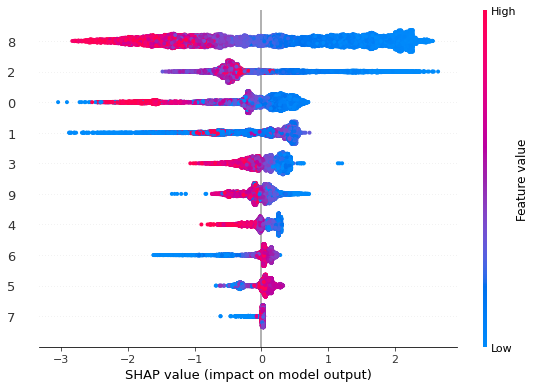

In [37]:
shap.initjs()
shap.summary_plot(shap_values, X_train)

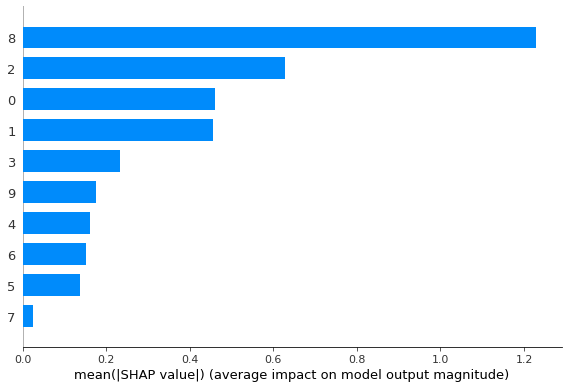

In [23]:
shap.initjs()
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [46]:
shap.initjs()
idx = 8008
shap.force_plot(explainer.expected_value, shap_values[idx, :], X_train.iloc[idx, :])

In [47]:
shap.initjs()
idx = 3535
shap.force_plot(explainer.expected_value, shap_values[idx, :], X_train.iloc[idx, :])